# IMDB Movies Sentiment Analysis Using DNN

### Imports :

In [1]:
import os 
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

2022-07-29 18:21:55.831703: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-29 18:21:55.831740: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from keras import models, layers

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

### Data Preprocessing :

In [5]:
labels = []
texts = []
label_types = ["neg","pos"]

#### Label Encoding:
- positive: 1
- negative: 0

In [6]:
# directories
data_dir = "./aclImdb/"
train_dir = os.path.join(data_dir,"train")

In [7]:
for label_type in label_types:
    dir_name = os.path.join(train_dir,label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == ".txt":
            my_file = open(os.path.join(dir_name,fname))
            texts.append(my_file.read())
            my_file.close()
            if label_type == "pos":
                labels.append(1)
            else:
                labels.append(0)
print("done..")

done..


### Tokenization:

In [9]:
maxlen = 500
training_samples = 9000
validation_samples = 3500
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [10]:
word_index = tokenizer.word_index
print("Unique tokens count:",len(word_index))

Unique tokens count: 87446


In [11]:
data = pad_sequences(sequences=sequences, maxlen=maxlen)
labels = np.asarray(labels)

In [12]:
print("Shape of data tensor:", data.shape)
print("Shape of label tensor", labels.shape)

Shape of data tensor: (24275, 500)
Shape of label tensor (24275,)


In [13]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
indices

array([21949, 10735, 14247, ..., 23977, 15840, 16953])

In [14]:
#shuffling to break the order of negative followed by positive
data = data[indices]

In [15]:
labels = labels[indices]

In [16]:
#splitting data
x_train = data[:training_samples]
x_val = data[training_samples:training_samples+validation_samples]
y_train = labels[:training_samples]
y_val = labels[training_samples:training_samples+validation_samples]

### Model Defination:

In [17]:
model = models.Sequential()
embedding_dim = 100
#mode layers
model.add(layers.Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(1, activation="sigmoid"))

2022-07-29 18:29:28.635773: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-29 18:29:28.635817: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-29 18:29:28.635846: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ozi): /proc/driver/nvidia/version does not exist
2022-07-29 18:29:28.677013: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 100)          1000000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                4256      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1,004,289
Trainable params: 1,004,289
Non-trainable params: 0
_________________________________________________________________


### Training the model :

In [19]:
model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=['acc'])

In [20]:
history = model.fit(x_train,y_train, epochs=10, batch_size=32, validation_data=(x_val,y_val))

Epoch 1/10
282/282 [==============================] - 148s 504ms/step - loss: 0.5950 - acc: 0.6658 - val_loss: 0.4202 - val_acc: 0.8234
Epoch 2/10
282/282 [==============================] - 144s 510ms/step - loss: 0.3521 - acc: 0.8497 - val_loss: 0.3904 - val_acc: 0.8366
Epoch 3/10
282/282 [==============================] - 139s 494ms/step - loss: 0.2227 - acc: 0.9149 - val_loss: 0.4484 - val_acc: 0.8440
Epoch 4/10
282/282 [==============================] - 132s 468ms/step - loss: 0.1243 - acc: 0.9559 - val_loss: 0.5202 - val_acc: 0.8066
Epoch 5/10
282/282 [==============================] - 129s 458ms/step - loss: 0.0548 - acc: 0.9837 - val_loss: 0.8639 - val_acc: 0.7937
Epoch 6/10
282/282 [==============================] - 139s 491ms/step - loss: 0.0279 - acc: 0.9910 - val_loss: 0.6543 - val_acc: 0.7943
Epoch 7/10
282/282 [==============================] - 137s 485ms/step - loss: 0.0143 - acc: 0.9957 - val_loss: 0.6429 - val_acc: 0.8114
Epoch 8/10
282/282 [============================

### Results plotting:

In [21]:
# results plotting function
def plot_results(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

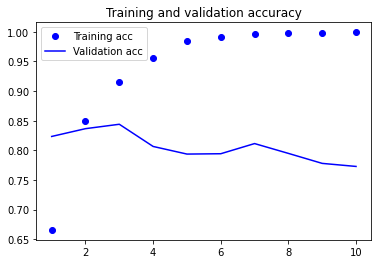

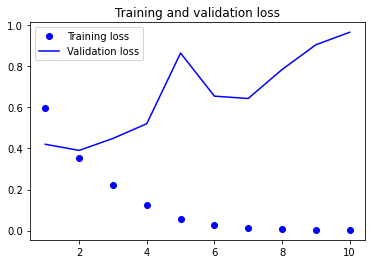

In [22]:
plot_results(history)